<a href="https://colab.research.google.com/github/weilee0622/Machine-Learning/blob/master/Multilayer_Perceptron_(Backpropagation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Building an Image Classifier with Multilayer Perceptron

### Setup

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.4.0'

In [3]:
keras.__version__

'2.4.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

### Split 5000 training data as validation image

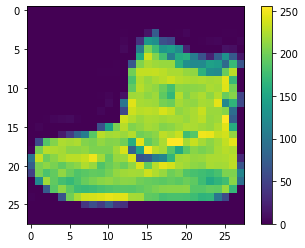

In [8]:
plt.figure()
plt.imshow(X_train_full[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
X_valid, X_train = X_train_full[0: 5000] / 255, X_train_full[5000:] / 255 #Scale as 0 to 1
y_valid, y_train = y_train_full[0:5000], y_train_full[5000:]
X_test = X_test / 255

In [10]:
X_train.shape

(55000, 28, 28)

In [11]:
X_valid.shape

(5000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

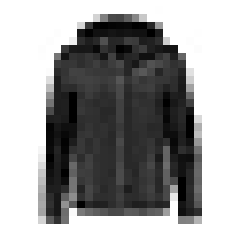

In [13]:
#No. 5001 image
plt.imshow(X_train[0], cmap = 'binary')
plt.axis('off')
plt.show()

In [14]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [21]:
#Create list of string based on the label
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [18]:
class_names[y_train[0]]

'Coat'

### Creating the Model Using the Sequential API

In [90]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) #Flatten to one dimension array as input layer

#Create 2 hidden layers, Dense = neurons
model.add(keras.layers.Dense(300, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(keras.layers.Dense(300, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(10, activation='softmax'))

In [91]:
model.layers

In [92]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_22 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_23 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1010      
Total params: 356,910
Trainable params: 356,910
Non-trainable params: 0
________________________________________________

### Compiling the Model

In [93]:
#Stochastic Gradient Descent for optimizer
#Not using mini-batch
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [94]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 5s 3ms/step - loss: 7.3811 - accuracy: 0.6393 - val_loss: 4.3257 - val_accuracy: 0.8244
Epoch 2/50
1719/1719 [==============================] - 4s 2ms/step - loss: 3.8037 - accuracy: 0.8082 - val_loss: 2.4355 - val_accuracy: 0.8448
Epoch 3/50
1719/1719 [==============================] - 4s 2ms/step - loss: 2.2152 - accuracy: 0.8210 - val_loss: 1.5206 - val_accuracy: 0.8386
Epoch 4/50
1719/1719 [==============================] - 4s 2ms/step - loss: 1.4114 - accuracy: 0.8286 - val_loss: 1.0469 - val_accuracy: 0.8430
Epoch 5/50
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0024 - accuracy: 0.8339 - val_loss: 0.7916 - val_accuracy: 0.8544
Epoch 6/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7876 - accuracy: 0.8395 - val_loss: 0.6644 - val_accuracy: 0.8530
Epoch 7/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6802 - accuracy: 0.8419 - val_loss: 0.6347 - val_accuracy:

In [95]:
history.params

{'epochs': 50, 'steps': 1719, 'verbose': 1}

In [96]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [97]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

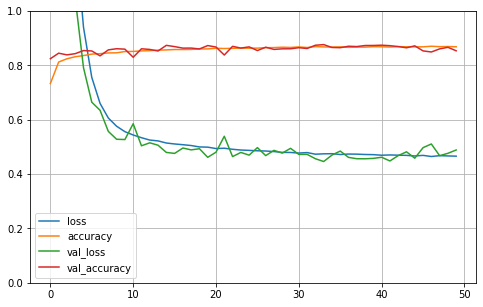

In [98]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [99]:
#Can use L1, L2 regularization or chagne the perceptron architecrture to fix the overfitting
test_los, test_acc = model.evaluate(X_test, y_test)

print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.5344 - accuracy: 0.8387
0.838699996471405


### Using the Model to Make Predictions

In [44]:
X_new = X_test[0:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.02, 0.  , 0.92],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [45]:
#Predict the output to the highest probability
np.argmax(model.predict(X_new), axis=-1)

array([9, 2, 1])

In [46]:
#Actual label
#All classified correctly
y_test[0:3]

array([9, 2, 1], dtype=uint8)